<a href="https://colab.research.google.com/github/Mohith-11/Plant-disease-detection/blob/main/plant_disease_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()       # choose  ➜  New Plant Diseases Dataset(Augmented).zip


Saving New Plant Diseases Dataset(Augmented).zip to New Plant Diseases Dataset(Augmented).zip


In [ ]:
!rm -rf dataset
!unzip -q "New Plant Diseases Dataset(Augmented).zip" -d dataset


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/dataset/New Plant Diseases Dataset(Augmented)/train'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    validation_split=0.2   # 80% train, 20% validation
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 10479 images belonging to 7 classes.
Found 2617 images belonging to 7 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_gen, validation_data=val_gen, epochs=15)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 75s 208ms/step - accuracy: 0.4349 - loss: 1.4168 - val_accuracy: 0.7062 - val_loss: 0.7901
Epoch 2/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 63s 191ms/step - accuracy: 0.7519 - loss: 0.6562 - val_accuracy: 0.8586 - val_loss: 0.3863
Epoch 3/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 62s 190ms/step - accuracy: 0.8374 - loss: 0.4530 - val_accuracy: 0.8922 - val_loss: 0.3000
Epoch 4/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 63s 193ms/step - accuracy: 0.8699 - loss: 0.3647 - val_accuracy: 0.8915 - val_loss: 0.2925
Epoch 5/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 64s 195ms/step - accuracy: 0.9026 - loss: 0.2840 - val_accuracy: 0.9496 - val_loss: 0.1454
Epoch 6/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 64s 194ms/step - accuracy: 0.9315 - loss: 0.1990 - val_accuracy: 0.9614 - val_loss: 0.1148
Epoch 7/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 63s 192ms/step - accuracy: 0.9380 - loss: 0.1820 - val_accuracy: 0.9473 - val_loss: 0.1564
Epoch 8/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 62s 190ms/step - accuracy: 0.9493 - loss: 0

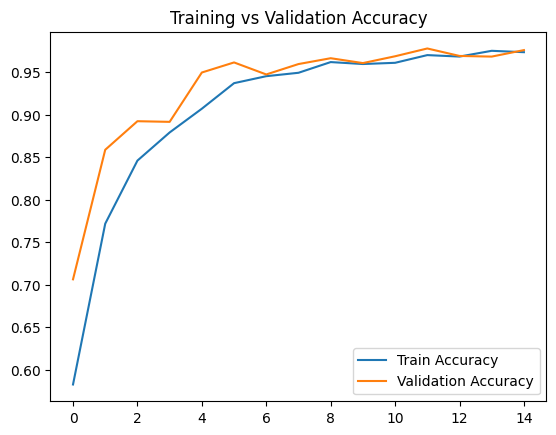

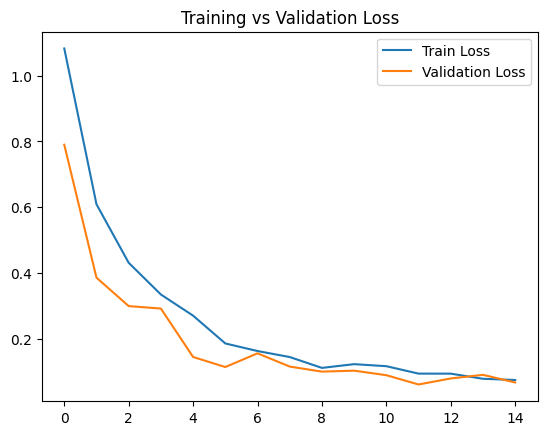

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [ ]:
model.save('cnn_model_v1.h5')

from google.colab import files
files.download('cnn_model_v1.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/dataset/New Plant Diseases Dataset(Augmented)/train'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 10479 images belonging to 7 classes.
Found 2617 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
base_model.trainable = False   # freeze pretrained layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         8,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,266,951 (8.65 MB)

 Trainable params: 8,967 (35.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 194s 544ms/step - accuracy: 0.7035 - loss: 0.8578 - val_accuracy: 0.9587 - val_loss: 0.1643
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 150s 458ms/step - accuracy: 0.9390 - loss: 0.1881 - val_accuracy: 0.9683 - val_loss: 0.1114
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 150s 459ms/step - accuracy: 0.9666 - loss: 0.1244 - val_accuracy: 0.9736 - val_loss: 0.0945
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 149s 453ms/step - accuracy: 0.9647 - loss: 0.1133 - val_accuracy: 0.9725 - val_loss: 0.0846
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 149s 455ms/step - accuracy: 0.9728 - loss: 0.0928 - val_accuracy: 0.9817 - val_loss: 0.0682
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 149s 454ms/step - accuracy: 0.9695 - loss: 0.0870 - val_accuracy: 0.9790 - val_loss: 0.0635
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 148s 453ms/step - accuracy: 0.9755 - loss: 0.0751 - val_accuracy: 0.9828 - val_loss: 0.0577
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 149s 455ms/step - accuracy: 0.9732 -

82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 411ms/step
                                          precision    recall  f1-score   support

                      Apple___Apple_scab       0.15      0.15      0.15       403
                       Apple___Black_rot       0.14      0.15      0.15       397
                Apple___Cedar_apple_rust       0.16      0.16      0.16       352
                         Apple___healthy       0.16      0.16      0.16       401
                     Blueberry___healthy       0.16      0.16      0.16       363
Cherry_(including_sour)___Powdery_mildew       0.14      0.14      0.14       336
       Cherry_(including_sour)___healthy       0.15      0.15      0.15       365

                                accuracy                           0.15      2617
                               macro avg       0.15      0.15      0.15      2617
                            weighted avg       0.15      0.15      0.15      2617



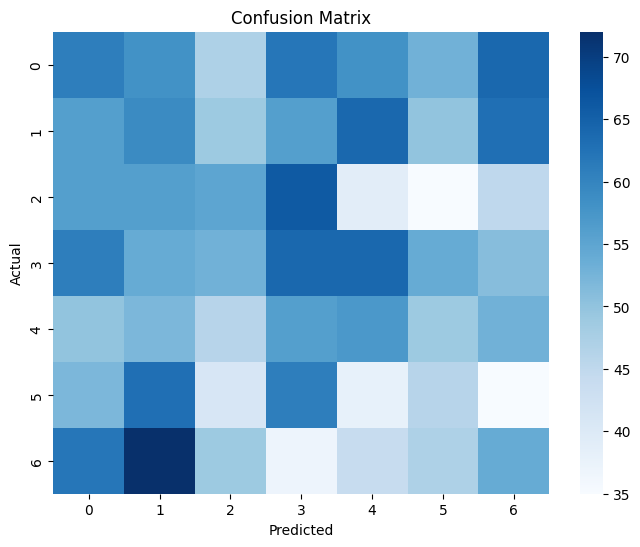

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

val_gen.reset()
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

print(classification_report(y_true, y_pred, target_names=list(val_gen.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


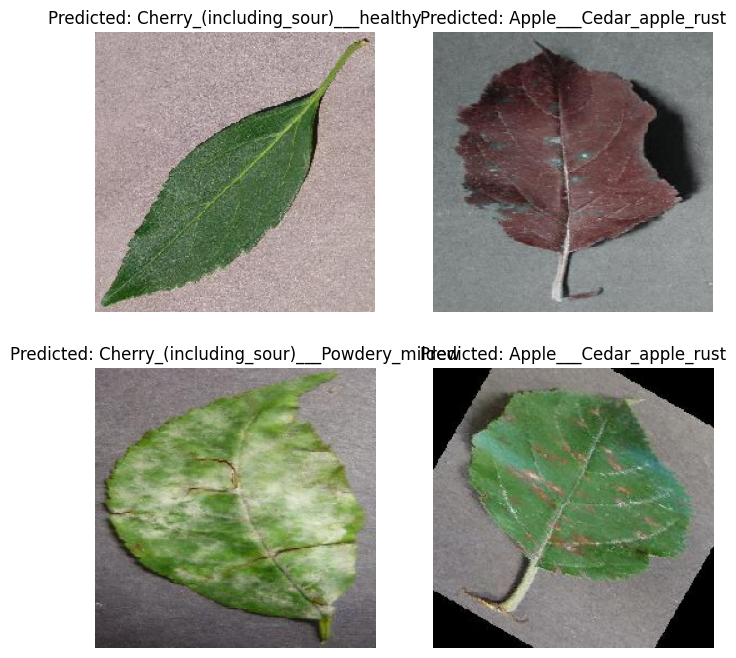

In [ ]:
import random
from tensorflow.keras.preprocessing import image

files = val_gen.filepaths
sample_files = random.sample(files, 4)

plt.figure(figsize=(8,8))
for i, img_path in enumerate(sample_files):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)/255.0
    x = np.expand_dims(x, axis=0)
    pred = model.predict(x)
    class_name = list(val_gen.class_indices.keys())[np.argmax(pred)]
    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.title(f'Predicted: {class_name}')
    plt.axis('off')
plt.savefig('sample_predictions.png')
plt.show()


In [ ]:
model.save('mobilenetv2_model.h5')
from google.colab import files
files.download('mobilenetv2_model.h5')
files.download('confusion_matrix.png')
files.download('sample_predictions.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2
import os


In [ ]:
model = tf.keras.models.load_model('/content/mobilenetv2_model.h5')
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
IMG_SIZE = (224, 224)

def load_and_preprocess(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_arr = image.img_to_array(img) / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)
    return img, img_arr


In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        pred_output = predictions[:, pred_index]

    grads = tape.gradient(pred_output, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
from google.colab import files
uploaded = files.upload()

test_img_path = list(uploaded.keys())[0]  # first uploaded file
print("Image selected:", test_img_path)


Saving 0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG to 0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG
Image selected: 0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG


In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)


0 mobilenetv2_1.00_224
1 global_average_pooling2d
2 dropout_1
3 dense_2


In [ ]:
for i, layer in enumerate(model.layers[0].layers):
    print(i, layer.name)


0 input_layer_1
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_rel

In [ ]:
base_model = model.layers[0]     # MobileNetV2
last_conv_layer = base_model.get_layer("Conv_1")
print("Using last conv layer:", last_conv_layer.name)


Using last conv layer: Conv_1


In [ ]:
def make_gradcam_heatmap(img_array, model, base_model, last_conv_layer_name):
    # 1. Get last conv layer
    last_conv_layer = base_model.get_layer(last_conv_layer_name)

    # 2. Build a model that maps image → (conv_outputs, predictions)
    grad_model = tf.keras.Model(
        inputs=base_model.input,
        outputs=[last_conv_layer.output, base_model.output]
    )

    # 3. Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(model.predict(img_array)[0])  # use full model for final class
        pred_output = predictions[:, pred_index]

    grads = tape.gradient(pred_output, conv_outputs)

    # 4. Pool gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    # 5. Multiply channels by gradients
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # 6. Normalize
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) + 1e-9

    return heatmap


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


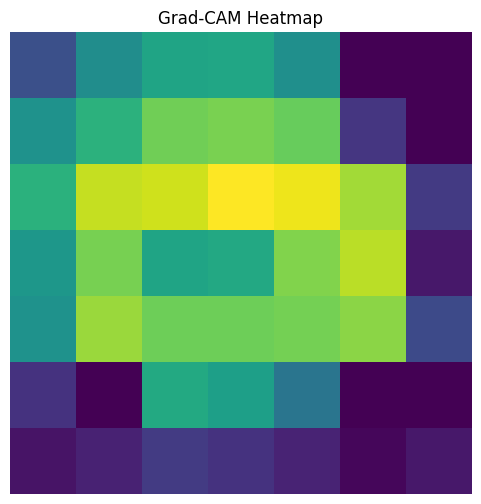

In [ ]:
orig_img, img_array = load_and_preprocess(test_img_path)

heatmap = make_gradcam_heatmap(
    img_array,
    model,
    base_model,
    "Conv_1"
)

plt.figure(figsize=(6,6))
plt.imshow(heatmap)
plt.title("Grad-CAM Heatmap")
plt.axis("off")
plt.savefig("gradcam_heatmap.png")
plt.show()


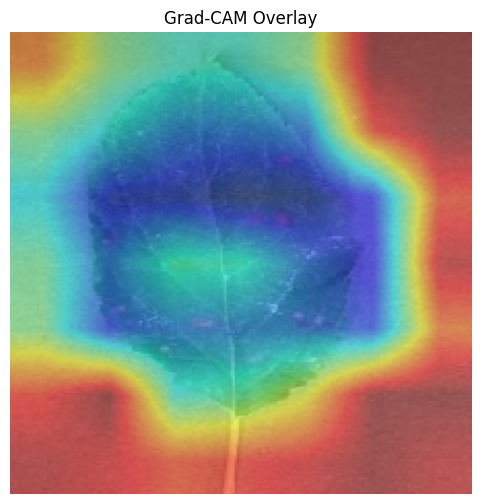

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def overlay_gradcam(heatmap, original_img, alpha=0.5):
    # Convert PIL image → OpenCV format
    original = np.array(original_img)

    # Resize heatmap to original image size
    heatmap = cv2.resize(heatmap, (original.shape[1], original.shape[0]))

    # Convert heatmap to RGB color map
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay heatmap on image
    overlay = cv2.addWeighted(original, 1 - alpha, heatmap_color, alpha, 0)

    return overlay

# Generate overlay
overlay_img = overlay_gradcam(heatmap, orig_img)

# Show overlay
plt.figure(figsize=(6,6))
plt.imshow(overlay_img)
plt.title("Grad-CAM Overlay")
plt.axis("off")
plt.savefig("gradcam_overlay.png")
plt.show()
